#Limites da Regressão linear

Uma das áreas em que a ciência de dados pode ser aplicada é na saúde, e um tema que está em foco é a pandemia do COVID-19. 
  
Uma das formas que se pode utilizar esses dados é para entender óbitos através do tempo como uma forma de prever a tendência futura e auxiliar em políticas públicas, por exemplo.

Sabendo de tudo isso, o epidemiologista chefe do Brasil te pediu pra analisar os dados de óbitos nacionais da semana 25 a 35 e quer saber quando que o número de mortes vai ser inferior a 100 óbitos por semana para saber quando toma a decisão de abrir as completamente as cidades.

Como essa decisão é importante, ele precisa de uma análise dos dados e como conhecedor da área da saúde, ele te deu uma **dica**: _uma regressão linear pode funcionar, mas epidemias tem comportamentos exponenciais do tipo A*exp(b*t)._

Então você deve:
- plotar os dados de semana por óbito e semana por ln(obito) e observar se tem alguma diferença entre os gráficos. 
-Fazer uma regressão de semana por obito e semana por ln(obito)
-Avaliar o melhor modelo através das métricas de: R², erro quadrático médio, gráficos dos resíduos, normalidade dos resíduos (teste de Shapiro) e homocedasticidade (teste de Breusch-Pagan)
-Você deve  escolher o melhor modelo que vai responder a pergunta do epidemiologista junto com uma conclusão

In [1]:
# aqui vai as bibliotecas que você vai usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm

## 1) Importação dos dados


É com esse dataset que vamos trabalhar e ele foi retirado do https://covid.saude.gov.br/ . Ele corresponde ao numero de óbitos por semana da semana 25 até a semana 35 de 2021.

In [2]:
semana = np.arange(25,36)
obitos = np.array([11935, 10852, 9306, 8373, 8182, 6922, 6382,6032,5421,4801,4352])
df=pd.DataFrame({'Semana':semana, 'Obitos':obitos}) #coloquei num dataframe pra ficar mais facil de plotar os dados
semana=semana.reshape(-1, 1) #coloquei aqui pra poder treinar o modelo mais facilmente

## 2) Análise gráfica

Aqui você pode plotar semana por óbitos em um gráfico de pontos

### 2.1) Visualização dos dados - tendência linear

<AxesSubplot:xlabel='Semana', ylabel='Obitos'>

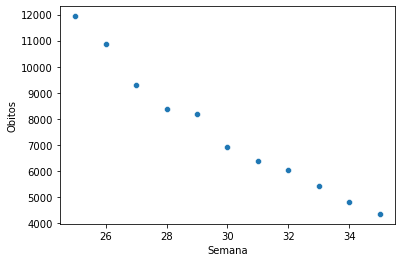

In [3]:
sns.scatterplot(data=df, x='Semana', y='Obitos')

### 2.2) Visualização dos dados - tendência do logaritmos dos óbitos



Podemos fazer uma coisa quando se tem poucos dados: **não vamos fazer o split dos dados** mas lembre-se de olhar bem as estatísticas e métricas para não ter overfitting!

<AxesSubplot:xlabel='Semana', ylabel='Obitos_exp'>

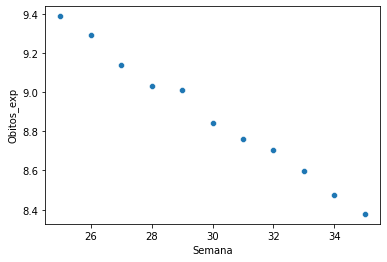

In [4]:
df['Obitos_exp'] = np.log(df['Obitos'])
sns.scatterplot(data=df,x='Semana', y='Obitos_exp')

## 3) Treinamento do modelo linear

###3.1) Regressão linear

In [5]:
X_linear = semana
X_linear = sm.add_constant(X_linear)
y_linear = df['Obitos']
modelo_linear = sm.OLS(y_linear, X_linear)
resultado_linear = modelo_linear.fit()
print(resultado_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                 Obitos   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     251.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           6.94e-08
Time:                        13:09:16   Log-Likelihood:                -82.472
No. Observations:                  11   AIC:                             168.9
Df Residuals:                       9   BIC:                             169.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.939e+04   1387.603     21.183      0.0

C:\Users\Pc\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 3.2) Gráfico dos resíduos da regressão

<AxesSubplot:>

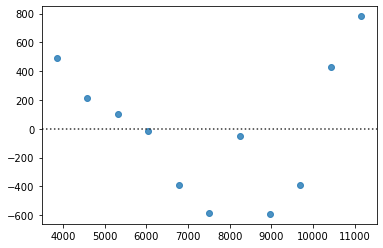

In [6]:
predicao_linear = resultado_linear.predict(X_linear)
residuos_linear = resultado_linear.resid 
sns.residplot(y=residuos_linear, x=predicao_linear)

### 3.3) Métricas
- RMSE
- Teste de normalidade dos resíduos
- Teste de homocedasticidade dos resíduos


In [10]:
print(f'RMSE: {sm.tools.eval_measures.rmse(y_linear, predicao_linear)}')

stat, p = sp.stats.shapiro(residuos_linear)
print('Statistics=%.3f, p=%.3f' % (stat,p))

sm.stats.het_breuschpagan(residuos_linear, resultado_linear.model.exog)

RMSE: 436.38104510728357
Statistics=0.948, p=0.623


(3.1565450595054574,
 0.07562307126980328,
 3.6219887474432135,
 0.08943609074405841)

## 4) Treinamento do modelo de ln(óbitos)

### 4.1)Regressão linear de Ln(y) 
_Observe que se você a curva segue y= a*exp(b*x), a equação fica ln(y) = ln(a)+b*x se colocar ln() dos dois lados_

In [11]:
X_exp = semana 
X_exp = sm.add_constant(X_exp)
y_exp = df['Obitos_exp']
modelo_exp = sm.OLS(y_exp, X_exp)
resultado_exp = modelo_exp.fit()
print(resultado_exp.summary())

                            OLS Regression Results                            
Dep. Variable:             Obitos_exp   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1335.
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           4.27e-11
Time:                        13:14:40   Log-Likelihood:                 24.721
No. Observations:                  11   AIC:                            -45.44
Df Residuals:                       9   BIC:                            -44.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8288      0.081    145.479      0.0

C:\Users\Pc\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 4.2) Gráfico dos resíduos da regressao de ln(óbitos)

<AxesSubplot:ylabel='Obitos_exp'>

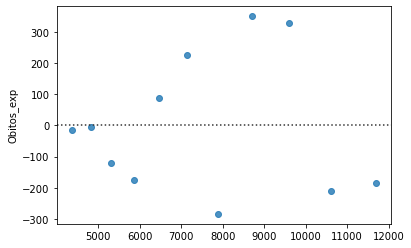

In [12]:
predicao_exp = resultado_exp.predict(X_exp)
residuos_exp = np.exp(predicao_exp) - np.exp(np.transpose(y_exp))
sns.residplot(y=residuos_exp, x=np.exp(predicao_exp))

### 4.3) Métricas
- RMSE
- Teste de normalidade dos resíduos
- Teste de homocedasticidade dos resíduos

In [15]:
print(f'RMSE: {sm.tools.eval_measures.rmse(np.exp(y_exp), np.exp(predicao_exp))}')

stat, p = sp.stats.shapiro(residuos_exp)
print('Statistics=%.3f, p=%.3f' % (stat,p))

sm.stats.het_breuschpagan(residuos_exp, resultado_exp.model.exog)

RMSE: 214.07239449511812
Statistics=0.928, p=0.388


(6.794328498722505,
 0.009144791323038422,
 14.539641641038349,
 0.004133495125161037)

## 5) Gráfico de comparação entre os dois modelos

Aqui você deve colocar os pontos do dataset e as linhas dos dois modelos e fazer uma comparação visual entre os dois

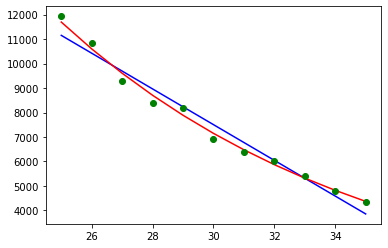

In [16]:
plt.plot(df['Semana'], predicao_linear, 'b', df['Semana'], np.exp(predicao_exp), 'r', df['Semana'], df['Obitos'], 'go')

## 6) Conclusão e conselho ao epidemiologista

Qual dos dois modelos é melhor? Porque? Quando que as cidades devem abrir?

O R² do linear é 0.965 e do modelo exponencial é de 0.993. O RMSE linear é 436.38 e do exponencial 214.07. Apesar dos dois modelos terem resíduos normais, apenas o exponencial tem homocedasticidade.

O modelo exponencial tem melhores métricas em comparação ao modelo linear e contextualizando com os dados, o modelo exponencial ajustado tende a zero no tempo infinito e o linear não, perdendo o sentido físico do dado.

Respondendo ao epidemiologista, ln(obitos = 100)= -0.0985*semanas + 11.83 e isolando as semanas, temos que a semana com menos de 100 mortes será a partir da semana 73 ou seja, daqui a aproximadamente 9 meses.
